# Basic Plotting

Using `matplotlib` can be an unintended lesson in maintaining zen. I walk through making plots look reasonable from a very basic starting point. 

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
from __future__ import absolute_import, division, print_function

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
import mpld3
import numpy as np
import pandas as pd
import os, sys
import warnings

# Plotting settings
WIDE_PLOT = (10, 6)
WIDER_PLOT = (12, 5)

In [3]:
# After you've gone through this:

# # This allows us to reset to matplotlib defaults
# # (pedagogical only, no need to do this day-to-day)
# inline_rc = dict(mpl.rcParams)
# # To reset to beginning matplotlib defaults :(
# mpl.rcParams.update(inline_rc)

# Setting the style at the top like the following can be useful
# sns.set()
# plt.rcParams['figure.figsize'] = (10, 6)
# sns.set_style("darkgrid")
# sns.set_context("poster", font_scale=1.3)


In [4]:
def sinplot(flip=1, ax=None):
    """Demo plot from seaborn."""
    x = np.linspace(0, 14, 500)
    for i in range(1, 7):
        ax.plot(x, np.sin(-1.60 + x + i * .5) * (7 - i) * flip, label=str(i))

In [5]:
x = np.linspace(0, 5. * np.pi, 1000)
y = np.sin(x)

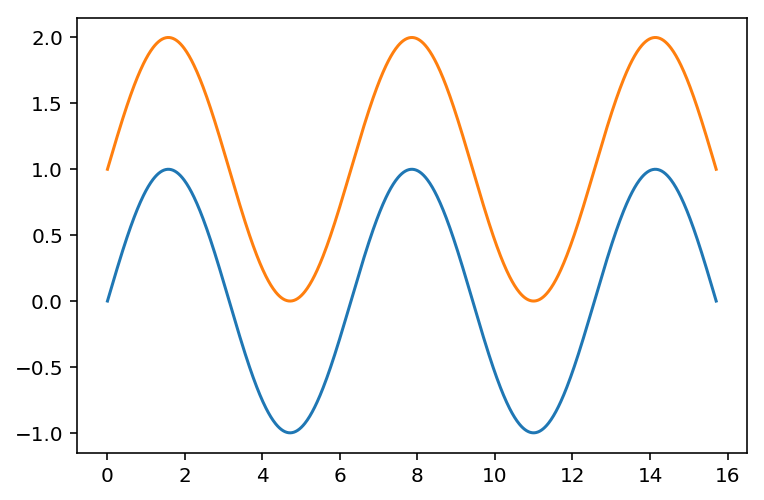

In [6]:
plt.plot(x, y)
plt.plot(x, y + 1)

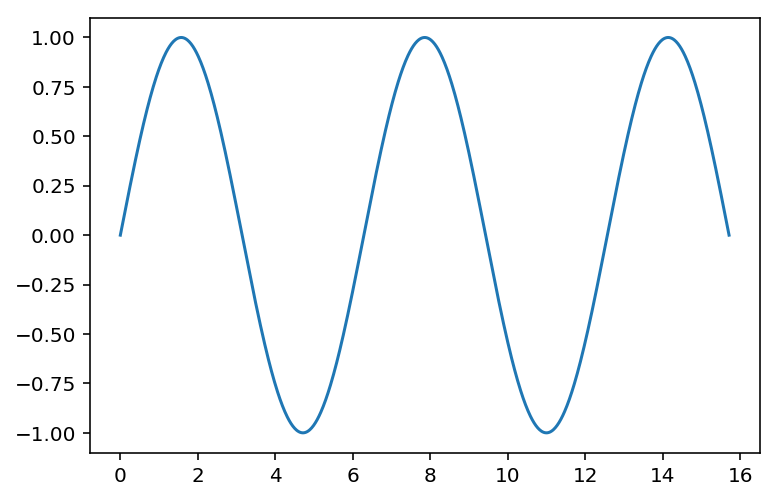

In [7]:
# Use trailing ";" to remove: [<matplotlib.lines.Line2D at 0x112059cf8]
plt.plot(x, y);

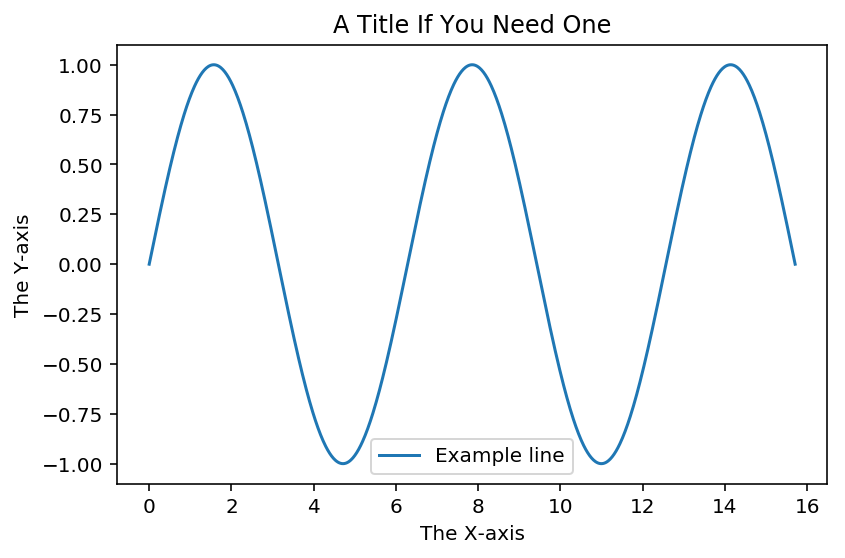

In [8]:
fig, ax = plt.subplots()
ax.plot(x, y, label='Example line')
ax.legend()
ax.set_xlabel("The X-axis")
ax.set_ylabel("The Y-axis")
ax.set_title("a title if you need one".title())
fig.tight_layout();

Such a tiny plot! Let's make it bigger!

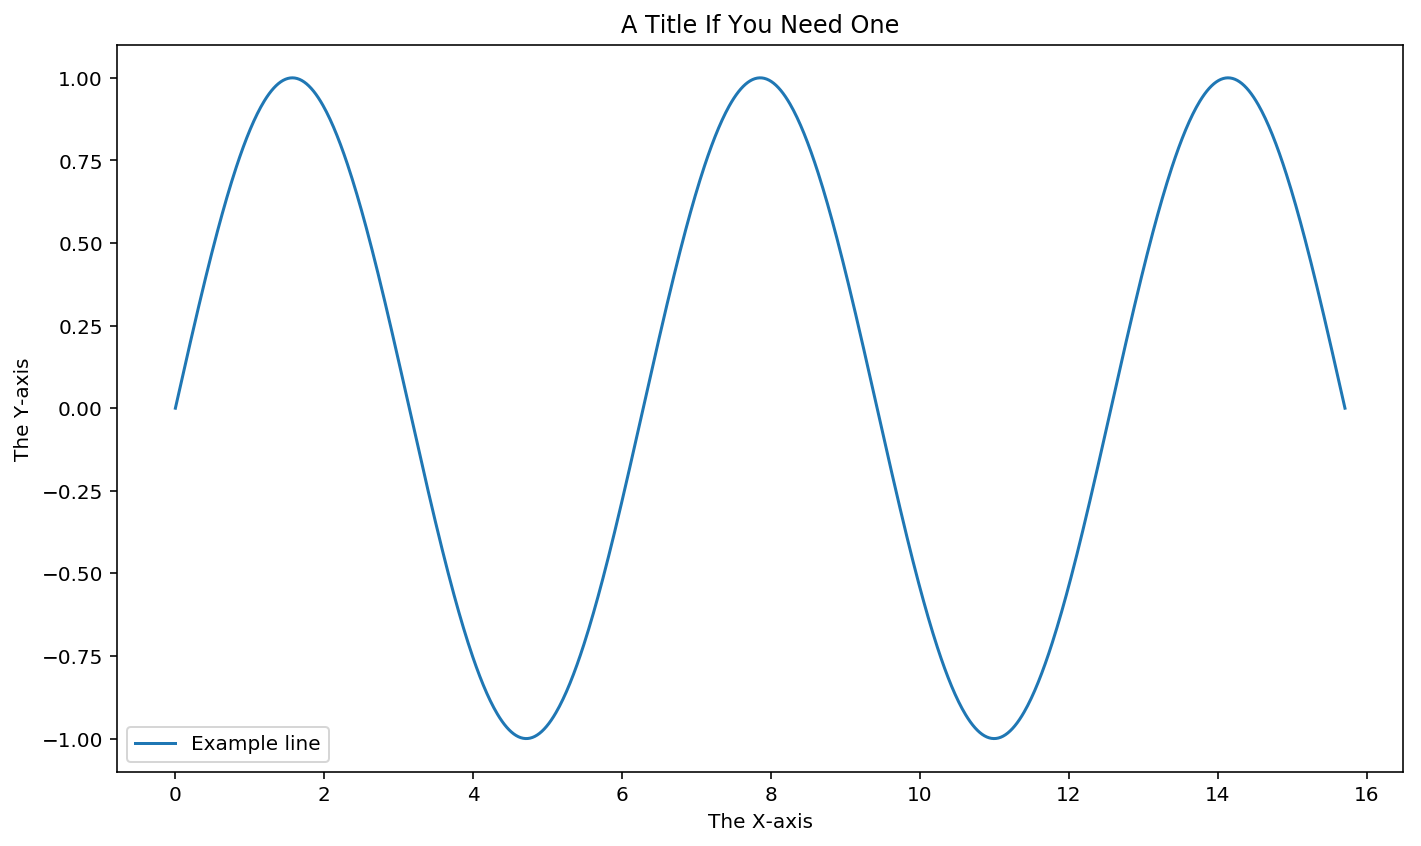

In [9]:
fig, ax = plt.subplots(figsize=WIDE_PLOT)
ax.plot(x, y, label='Example line')
ax.legend()
ax.set_xlabel("The X-axis")
ax.set_ylabel("The Y-axis")
ax.set_title("a title if you need one".title())
fig.tight_layout();

Now the plot is larger, but the text is tiny and terrible!

# Bring in seaborn

In [10]:
import seaborn as sns

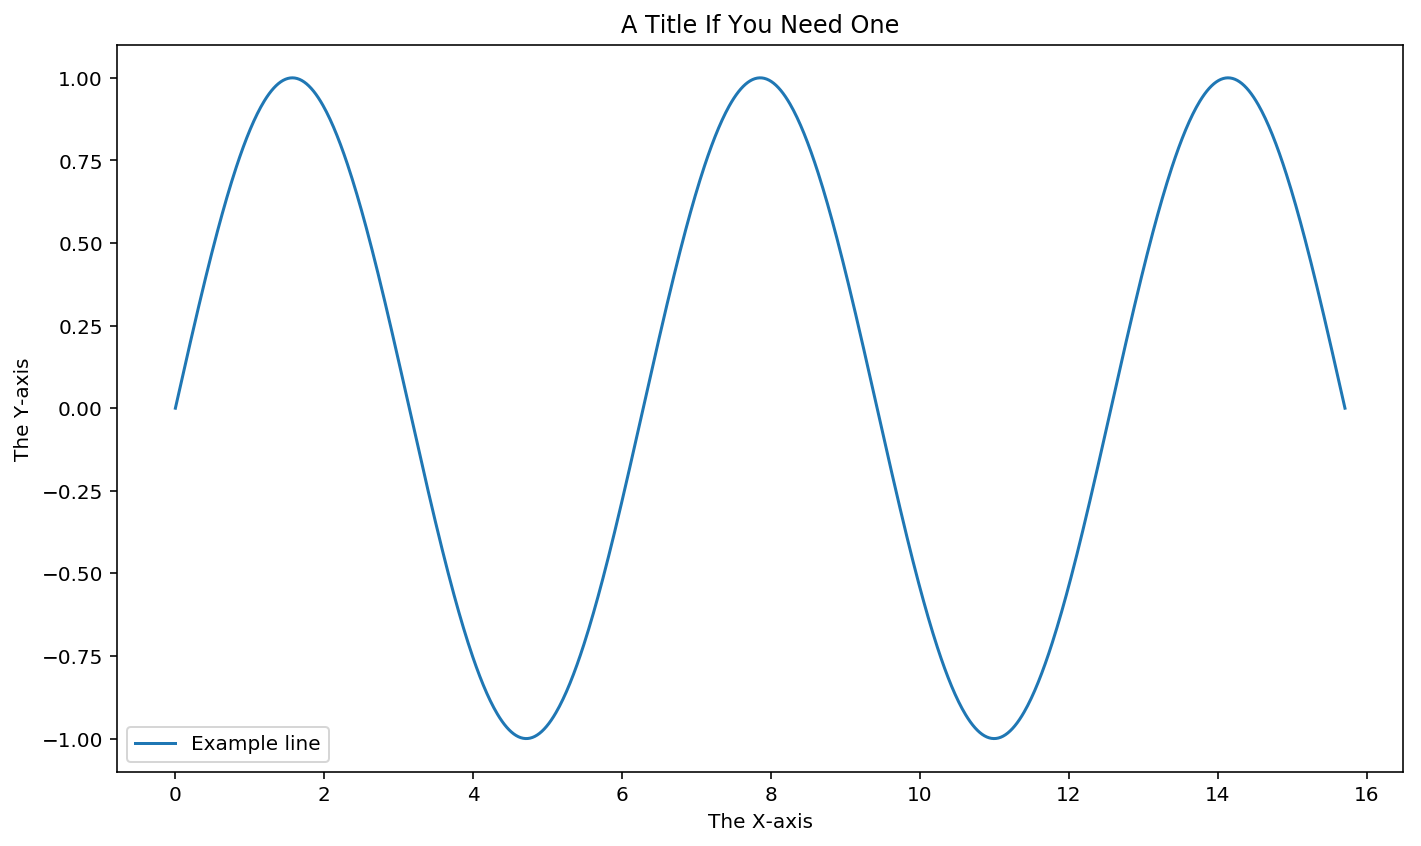

In [11]:
fig, ax = plt.subplots(figsize=WIDE_PLOT)
ax.plot(x, y, label='Example line')
ax.legend()
ax.set_xlabel("The X-axis")
ax.set_ylabel("The Y-axis")
ax.set_title("a title if you need one".title())
fig.tight_layout();

In [12]:
sns.set_context("poster", font_scale=1.3)

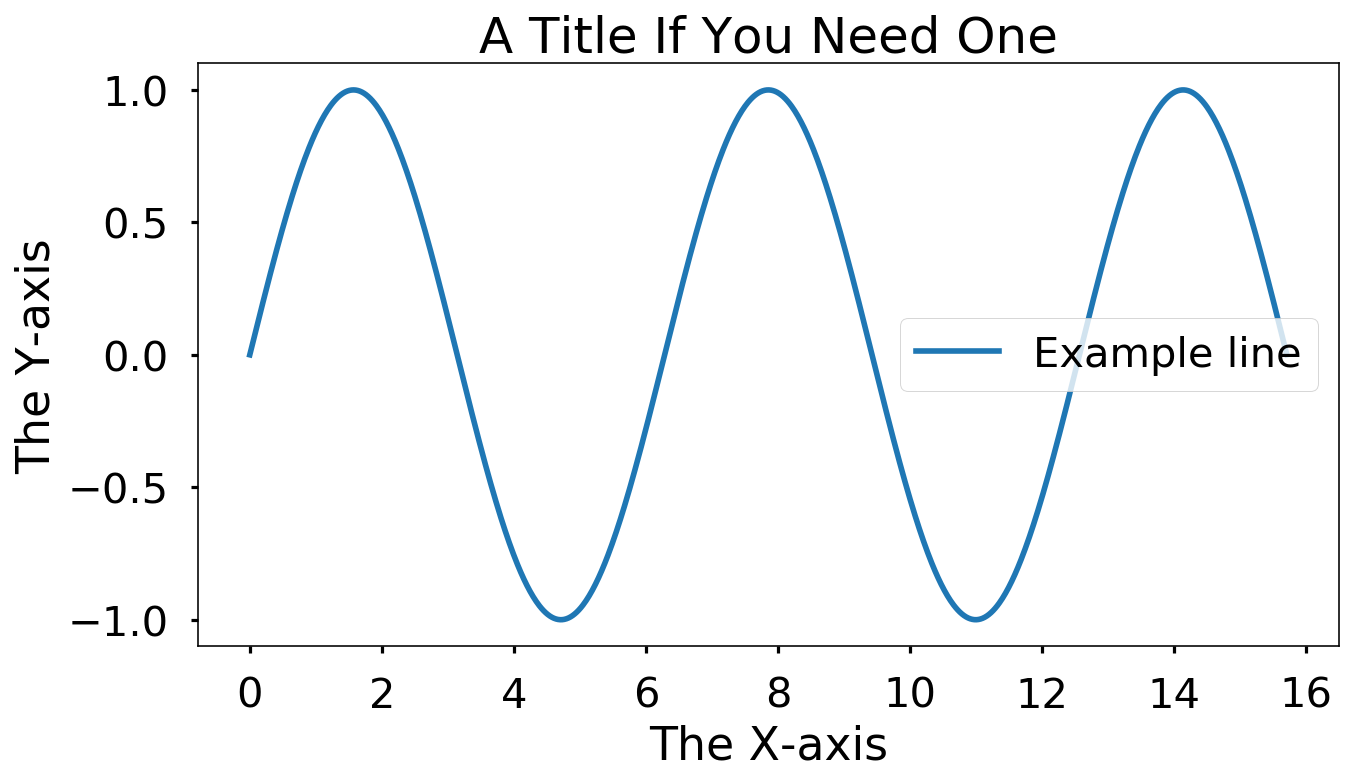

In [13]:
fig, ax = plt.subplots(figsize=WIDE_PLOT)
ax.plot(x, y, label='Example line')
ax.legend()
ax.set_xlabel("The X-axis")
ax.set_ylabel("The Y-axis")
ax.set_title("a title if you need one".title())
fig.tight_layout();

Legible plot! But that legend placement is bad and we should feel bad.

  
  
  
What do we do when we feel bad?

And then we fix the legend.

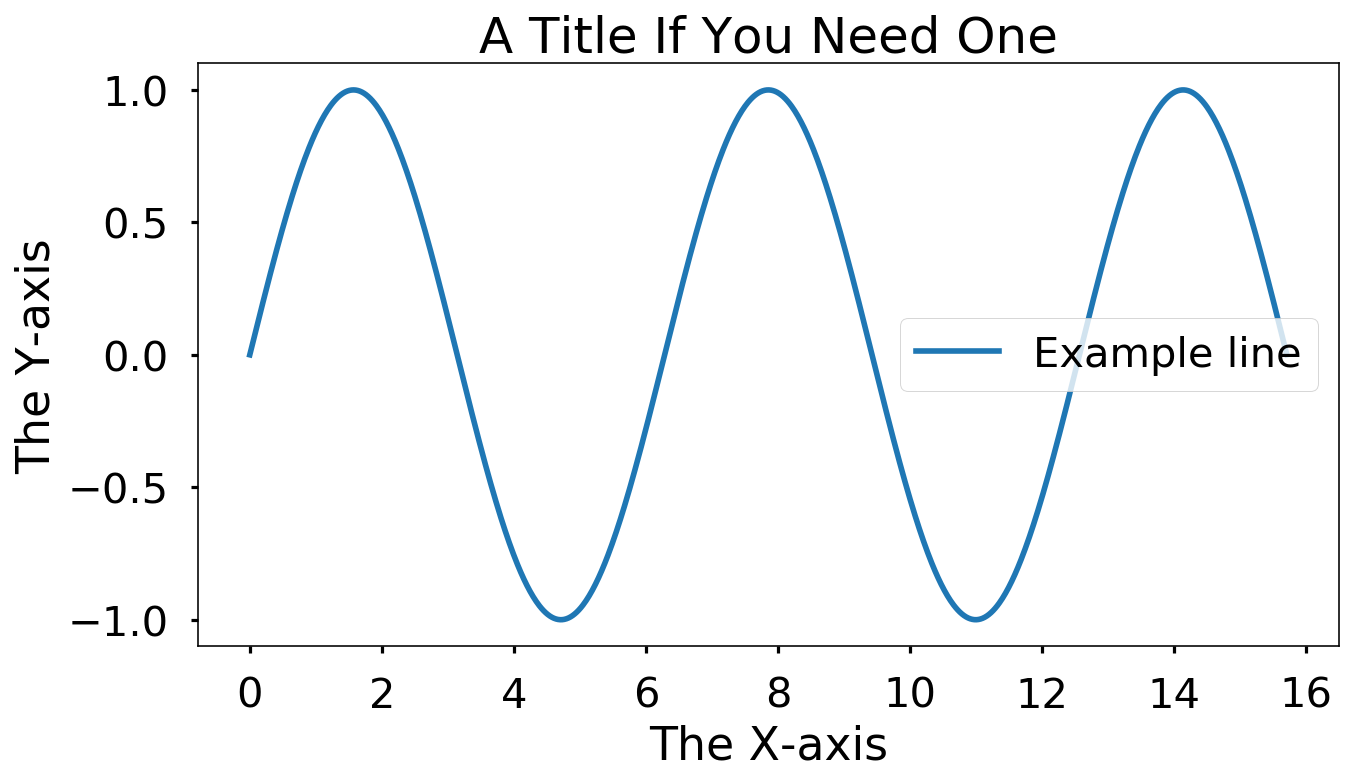

In [14]:
fig, ax = plt.subplots(figsize=WIDE_PLOT)
ax.plot(x, y, label='Example line')
# This magic usually helps (if not there are more options later!)
ax.legend(loc='best')
ax.set_xlabel("The X-axis")
ax.set_ylabel("The Y-axis")
ax.set_title("a title if you need one".title())
fig.tight_layout();

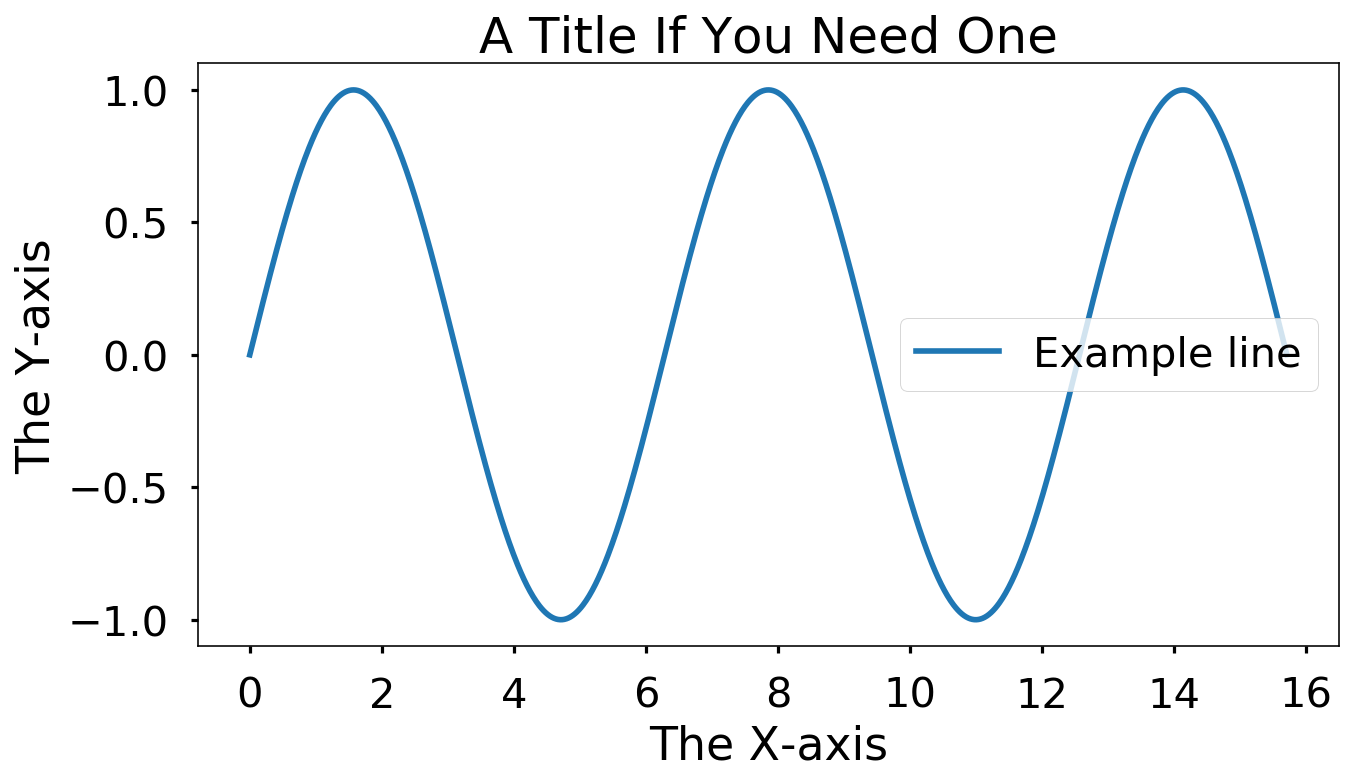

In [15]:
# And we can make the legends fancy
mpl.rcParams["legend.fancybox"] = True

fig, ax = plt.subplots(figsize=WIDE_PLOT)
ax.plot(x, y, label='Example line')
ax.legend(loc='best')
ax.set_xlabel("The X-axis")
ax.set_ylabel("The Y-axis")
ax.set_title("a title if you need one".title())
fig.tight_layout();

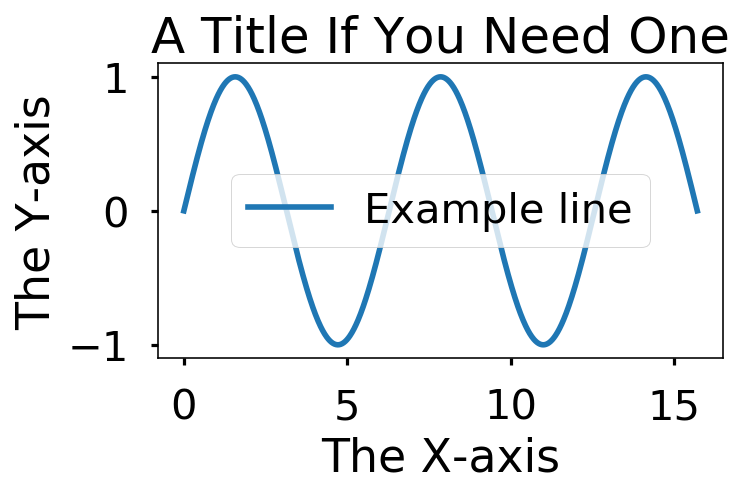

In [16]:
mpl.rcParams["legend.fancybox"] = True
fig, ax = plt.subplots()
ax.plot(x, y, label='Example line')
ax.legend(loc='best')
ax.set_xlabel("The X-axis")
ax.set_ylabel("The Y-axis")
ax.set_title("a title if you need one".title())
fig.tight_layout();

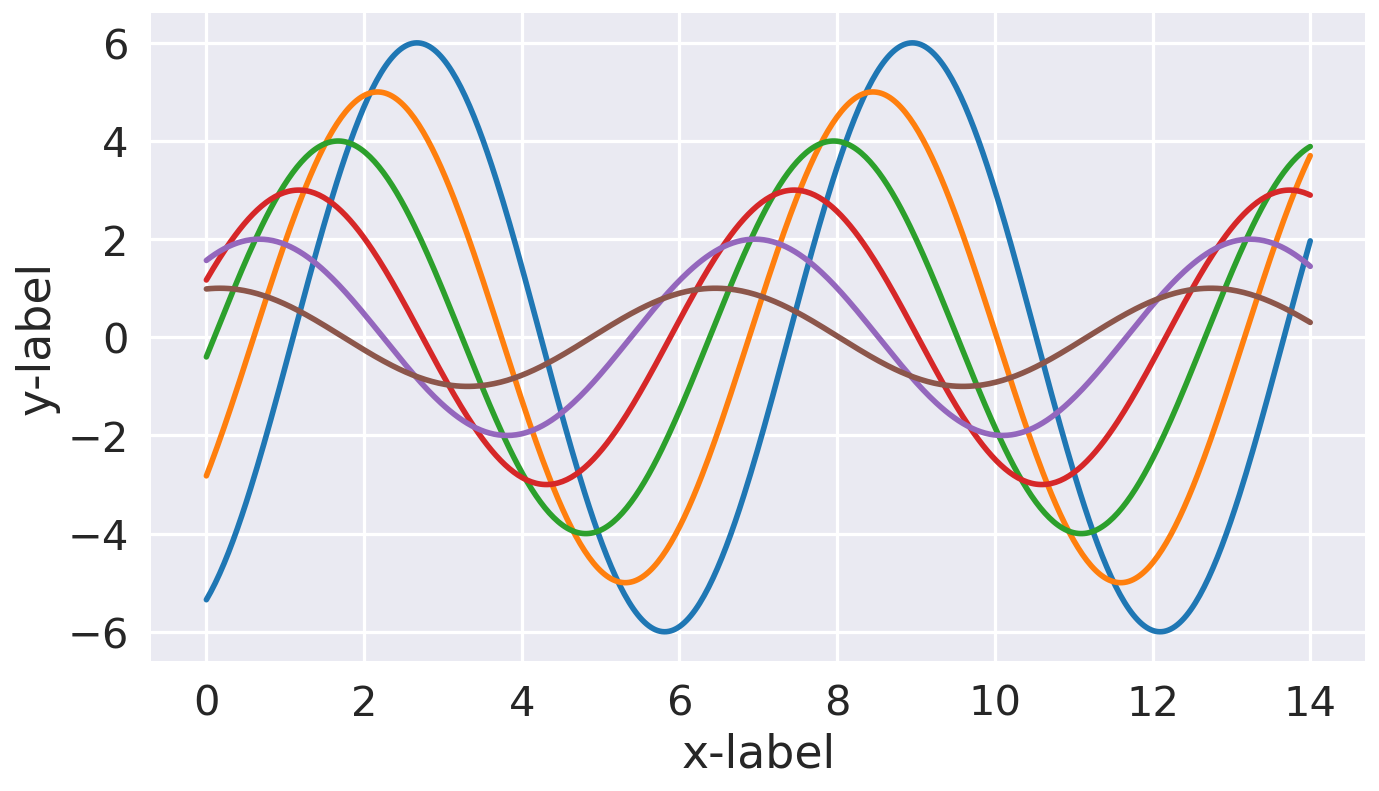

In [17]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=WIDE_PLOT)
    sinplot(ax=ax)
    ax.set_ylabel("y-label")
    ax.set_xlabel("x-label")
    fig.tight_layout();


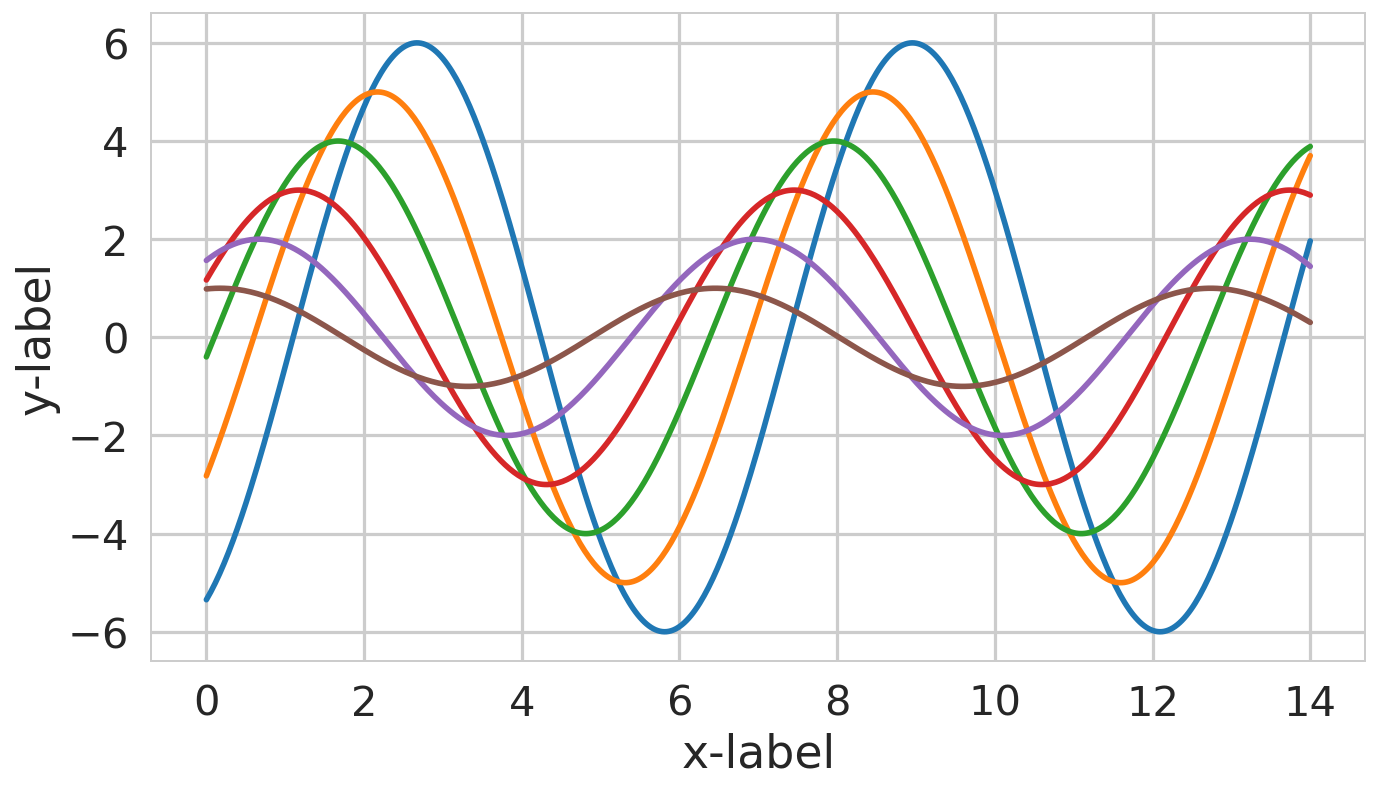

In [18]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=WIDE_PLOT)
    sinplot(ax=ax)
    ax.set_ylabel("y-label")
    ax.set_xlabel("x-label")
    fig.tight_layout();


## Put the legend on the outside

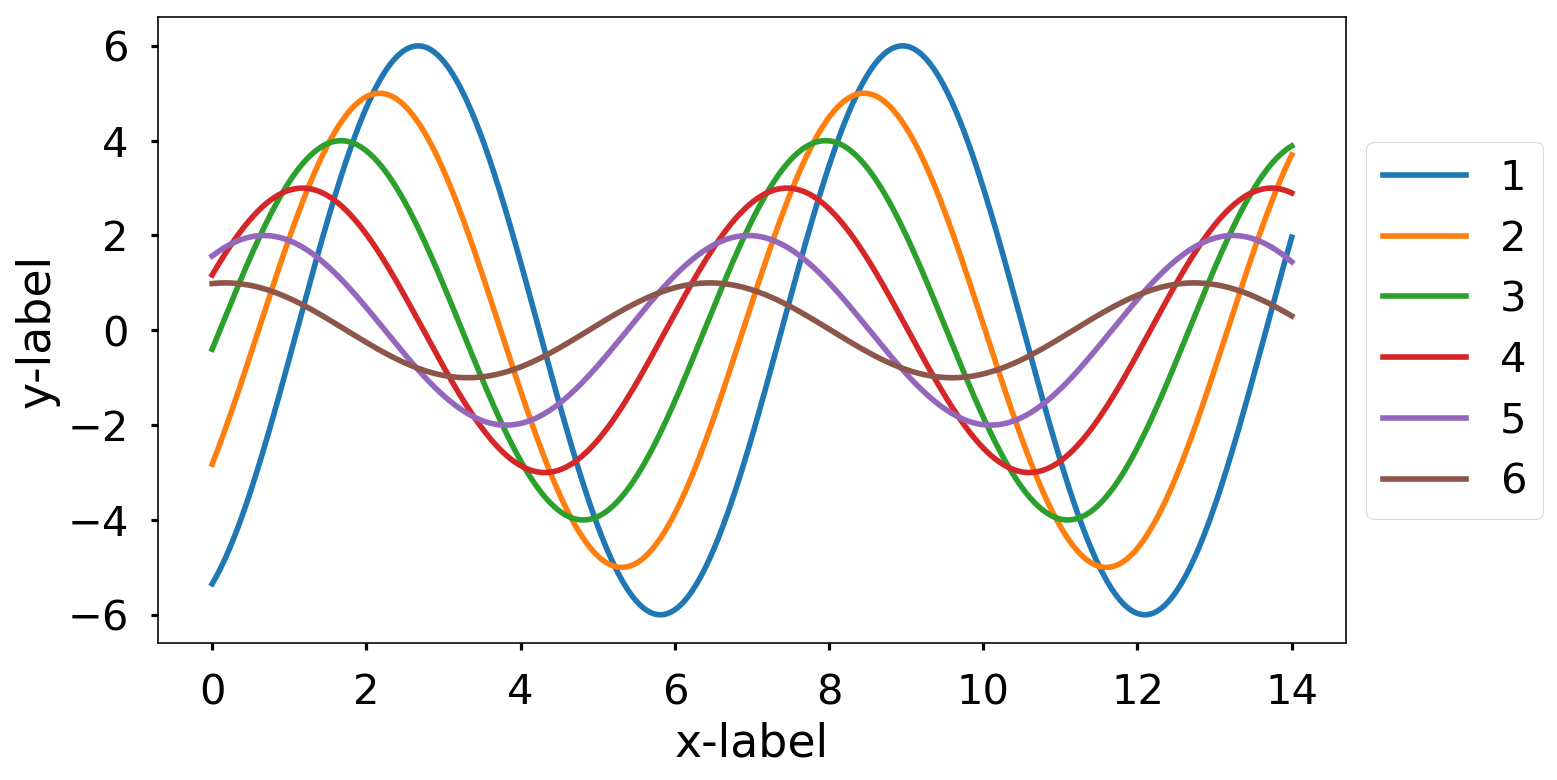

In [19]:
fig, ax = plt.subplots(figsize=WIDE_PLOT)
sinplot(ax=ax)
ax.set_ylabel("y-label")
ax.set_xlabel("x-label")
# This is how to get the legend out of the plot in a reasonable way
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout();

## Order plot elements

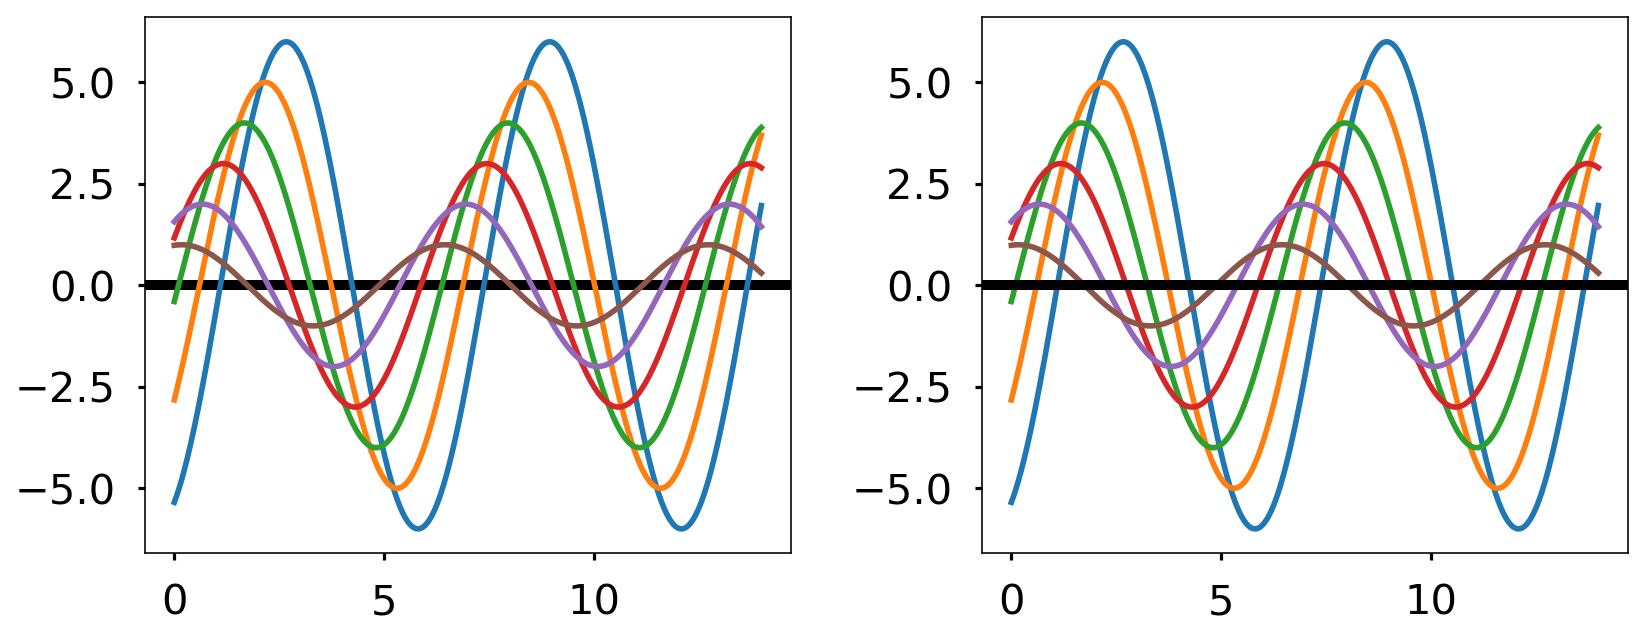

In [20]:
fig, (ax1, ax2) = plt.subplots(figsize=WIDER_PLOT, ncols=2)
sinplot(ax=ax1)
sinplot(ax=ax2)

ax1.axhline(0, color='k', zorder=-10, lw=5)
ax2.axhline(0, color='k', zorder=10, lw=5)
fig.tight_layout()